In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
tracks=pd.read_csv('tracks_cleaned.csv')
tracks.head()

,name,popularity,duration,explicit,artists,id_artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_month,release_year
0,You'll Never Walk Alone - Mono; 2002 Remaster,56,160.187,0,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,2008-02-11,0.484,0.265,-11.101,0.0322,0.394,0.000000,0.149,0.285,113.564,2,2008
1,A Lover's Concerto,41,159.560,0,The Toys,6lH5PpuiMa5SpfjoIOlwCS,2020-03-13,0.671,0.867,-2.706,0.0571,0.436,0.000000,0.139,0.839,120.689,3,2020
2,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141.987,0,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,2008-02-11,0.405,0.365,-10.226,0.0289,0.255,0.000005,0.163,0.588,104.536,2,2008
3,Don't Let the Sun Catch You Crying (Main) - Mono,34,157.093,0,Gerry & The Pacemakers,3UmBeGyNwr4iDWi1vTxWi8,2008-02-11,0.477,0.352,-14.165,0.0300,0.406,0.000000,0.122,0.478,106.773,2,2008
4,The September Of My Years - Live At The Sands ...,26,187.333,0,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,2018-05-04,0.319,0.201,-17.796,0.0623,0.887,0.000000,0.904,0.239,117.153,5,2018


In [3]:
artists=pd.read_csv('artists_cleaned.csv')
artists.head()

,id,followers,genres,name,popularity,main_genre
0,1OsJZxSshQD4BCg1VtwxsN,155.0,classical contralto,Anna Larsson,19,classic
1,3zQdpHMTdJnV4aCzGqCBYK,3918.0,"classic persian pop, persian traditional",Javad Maroufi,26,traditional
2,7frYUe4C7A42uZqCzD34Y4,53636.0,"desi pop, punjabi hip hop, punjabi pop",Sultaan,53,pop
3,6acbdy69rtlv8m9EW31MYl,72684.0,"afro dancehall, afropop, azontobeats, nigerian...",Phyno,51,pop
4,72578usTM6Cj5qWsi471Nc,248568.0,"filmi, indian folk, indian rock, kannada pop",Raghu Dixit,52,pop


## info

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204129 entries, 0 to 204128
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              204129 non-null  object 
 1   popularity        204129 non-null  int64  
 2   duration          204129 non-null  float64
 3   explicit          204129 non-null  int64  
 4   artists           204129 non-null  object 
 5   id_artists        204129 non-null  object 
 6   release_date      204129 non-null  object 
 7   danceability      204129 non-null  float64
 8   energy            204129 non-null  float64
 9   loudness          204129 non-null  float64
 10  speechiness       204129 non-null  float64
 11  acousticness      204129 non-null  float64
 12  instrumentalness  204129 non-null  float64
 13  liveness          204129 non-null  float64
 14  valence           204129 non-null  float64
 15  tempo             204129 non-null  float64
 16  release_month     20

In [5]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152693 entries, 0 to 152692
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          152693 non-null  object 
 1   followers   152693 non-null  float64
 2   genres      152693 non-null  object 
 3   name        152693 non-null  object 
 4   popularity  152693 non-null  int64  
 5   main_genre  152693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.0+ MB


# JOINING TABLES

In [6]:
tracks.rename(columns={'name':'track_name','popularity':'track_popularity'},inplace=True)
artists.rename(columns={'name':'artist_name','popularity':'artist_popularity'},inplace=True)

In [7]:
merged=tracks.set_index('id_artists').join(artists.set_index('id'),how='inner')

# alternative
# merged2=pd.merge(left=tracks,right=artists,left_on='id_artists',right_on='id',how='inner')

In [8]:
merged.shape

(120958, 22)

In [9]:
merged.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,120958.0,4.162250e+01,1.626339e+01,0.000,32.0000,42.000000,5.300000e+01,1.000000e+02
duration,120958.0,2.340657e+02,7.239546e+01,18.467,195.8400,225.809500,2.618000e+02,4.511716e+03
explicit,120958.0,1.411647e-01,3.481928e-01,0.000,0.0000,0.000000,0.000000e+00,1.000000e+00
danceability,120958.0,6.106077e-01,1.522529e-01,0.000,0.5100,0.618000,7.210000e-01,9.860000e-01
energy,120958.0,6.563035e-01,2.012955e-01,0.000,0.5230,0.679000,8.170000e-01,9.990000e-01
loudness,120958.0,-6.980661e+00,3.088139e+00,-51.800,-8.3630,-6.446000,-4.938000e+00,2.534000e+00
speechiness,120958.0,9.197145e-02,1.015362e-01,0.000,0.0336,0.047600,9.910000e-02,9.610000e-01
acousticness,120958.0,2.817119e-01,2.785526e-01,0.000,0.0406,0.182000,4.710000e-01,9.960000e-01
instrumentalness,120958.0,3.061940e-02,1.353653e-01,0.000,0.0000,0.000001,1.590000e-04,9.970000e-01
liveness,120958.0,1.940450e-01,1.657163e-01,0.000,0.0966,0.127000,2.410000e-01,9.980000e-01


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120958 entries, 000p4jMMhpEHq1h6PFCyO1 to 7zyObVag8rUjItn71SkIrh
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_name         120958 non-null  object 
 1   track_popularity   120958 non-null  int64  
 2   duration           120958 non-null  float64
 3   explicit           120958 non-null  int64  
 4   artists            120958 non-null  object 
 5   release_date       120958 non-null  object 
 6   danceability       120958 non-null  float64
 7   energy             120958 non-null  float64
 8   loudness           120958 non-null  float64
 9   speechiness        120958 non-null  float64
 10  acousticness       120958 non-null  float64
 11  instrumentalness   120958 non-null  float64
 12  liveness           120958 non-null  float64
 13  valence            120958 non-null  float64
 14  tempo              120958 non-null  float64
 15  release_month      

# EDA 

### TOP 10 popular tracks

In [11]:
top_10_track=merged[['track_name','artist_name','track_popularity']].sort_values('track_popularity',ascending=False).head(10)
top_10_track

,track_name,artist_name,track_popularity
id_artists,,,
1uNFoZAHBGtllmzznpCI3s,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,100
1McMsnEElThX1knmY4oliG,drivers license,Olivia Rodrigo,99
1uU7g3DNSbsu0QjSEqZtEd,Astronaut In The Ocean,Masked Wolf,98
1U1el3k54VvEUzo3ybLPlM,telepatía,Kali Uchis,97
1Xyo4u8uXC1ZmMpatF05PJ,Save Your Tears,The Weeknd,97
1Xyo4u8uXC1ZmMpatF05PJ,Blinding Lights,The Weeknd,96
0du5cEVh5yTK9QJze8zA0C,Leave The Door Open,Bruno Mars,96
4fxd5Ee7UefO4CUXgwJ7IP,Heartbreak Anniversary,Giveon,94
5cj0lLjcoR7YOSnhnX0Po5,Streets,Doja Cat,94


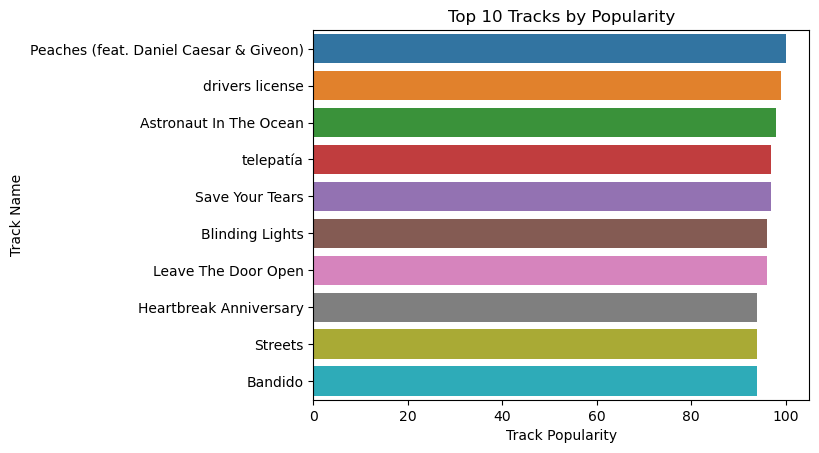

In [12]:
sns.barplot(x='track_popularity',y='track_name',data=top_10_track)
plt.xlabel('Track Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Popularity')
plt.show()

### TOP 10 popular artists (followers)

In [13]:
#pivot table
top_10_artists_followers=pd.pivot_table(index='artist_name',data=merged,values='followers',aggfunc='mean').nlargest(10,'followers')
top_10_artists_followers

,followers
artist_name,
Ed Sheeran,78900234.0
Ariana Grande,61301006.0
Drake,54416812.0
Justin Bieber,44606973.0
Eminem,43747833.0
Billie Eilish,41792604.0
Taylor Swift,38869193.0
Imagine Dragons,33665795.0
Queen,33483326.0


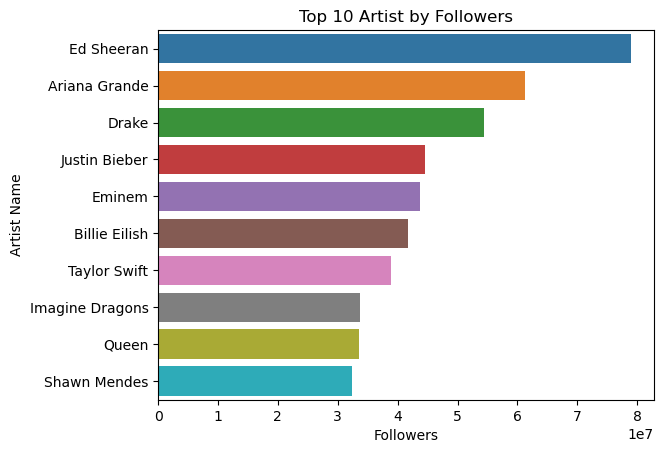

In [14]:
sns.barplot(x='followers',y=top_10_artists_followers.index,data=top_10_artists_followers)
plt.xlabel('Followers')
plt.ylabel('Artist Name')
plt.title('Top 10 Artist by Followers')
plt.show()

### TOP 10 popular artists (popularity)

In [15]:
#group by
top_10_artists_popularity=merged.groupby('artist_name')['artist_popularity'].mean().nlargest(10)
top_10_artists_popularity

artist_name
Justin Bieber    100.0
Bad Bunny         98.0
Drake             98.0
Taylor Swift      98.0
BTS               96.0
Juice WRLD        96.0
The Weeknd        96.0
Ariana Grande     95.0
Dua Lipa          95.0
J Balvin          95.0
Name: artist_popularity, dtype: float64

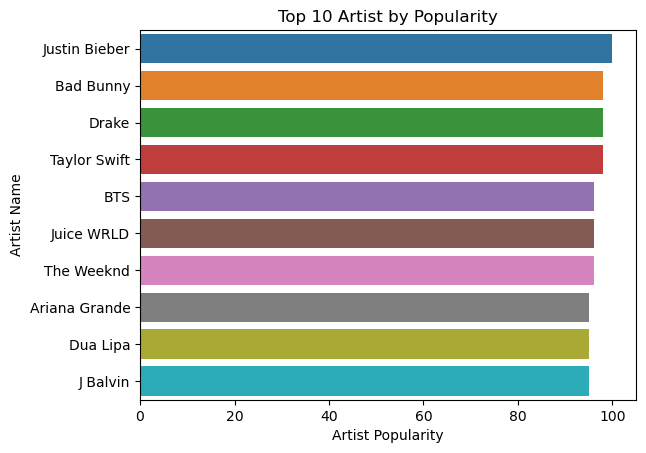

In [16]:
sns.barplot(x=top_10_artists_popularity.values,y=top_10_artists_popularity.index)
plt.xlabel('Artist Popularity')
plt.ylabel('Artist Name')
plt.title('Top 10 Artist by Popularity')
plt.show()

### track_popularity vs artist_popularity

Text(0.5, 1.0, 'Artist popularity V/S track_popularity')

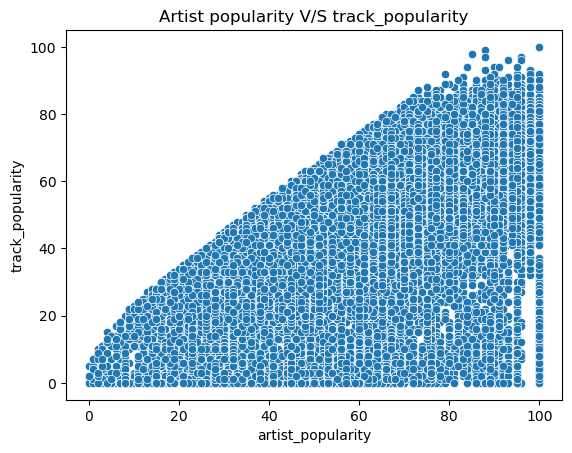

In [17]:
sns.scatterplot(y=merged.track_popularity,x=merged.artist_popularity)
plt.title('Artist popularity V/S track_popularity')

### 5. Factors that affect the track popularity

In [18]:
num=merged.select_dtypes(exclude='object').columns

<Axes: >

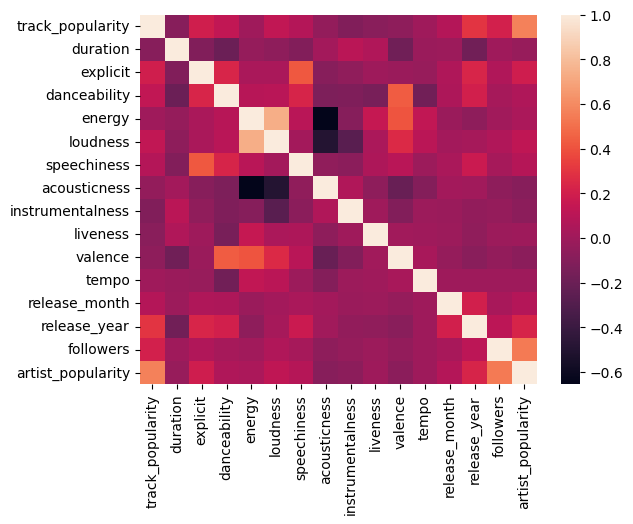

In [19]:
sns.heatmap(merged[num].corr())

### 6 duration

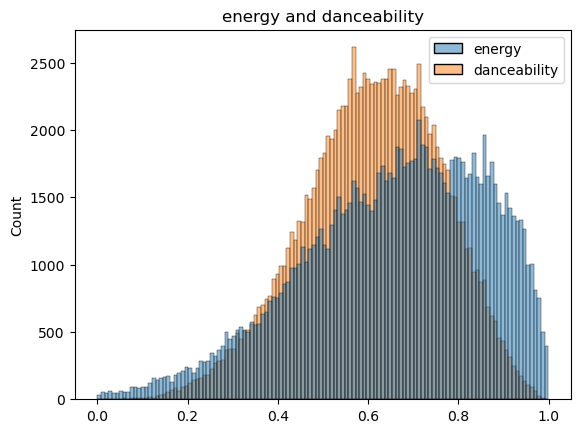

In [20]:
sns.histplot(merged[['energy','danceability']])
plt.title('energy and danceability')
plt.show()

### 7 number of explicit songs and popularity

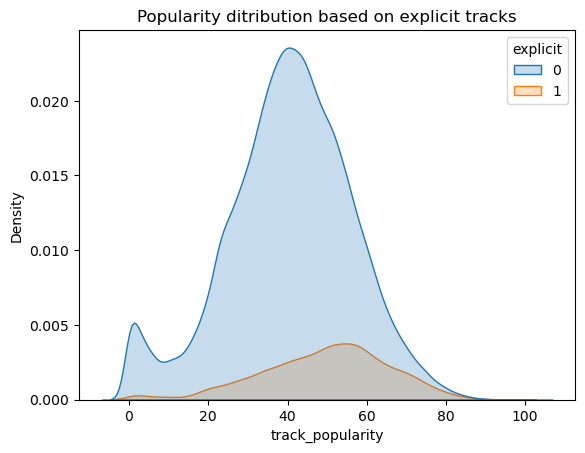

In [21]:
sns.kdeplot(hue=merged.explicit,x=merged.track_popularity,fill=True)
plt.title("Popularity ditribution based on explicit tracks")
plt.show()

# explicit vs non expicit followers

In [22]:
explicit_artists=merged[merged.explicit==1]['artists'].unique()
explicit_artists

array(['Emiway Bantai', 'Rózsaszín Pittbull', 'Willie Peyote', ...,
       'Crack Family', 'IAMDDB', 'Andery Toronto, Диман Брюханов'],
      dtype=object)

In [23]:
explicit_av_followers=np.round(merged[merged.artist_name.isin(explicit_artists)].groupby('artist_name')['followers'].mean().mean(),2)
nonexplicit_av_followers=np.round(merged[~merged.artist_name.isin(explicit_artists)].groupby('artist_name')['followers'].mean().mean(),2)

In [24]:
ex_noex_folowers=pd.DataFrame(index=['explicit','non_explicit'],data=[explicit_av_followers,nonexplicit_av_followers],columns=['Average Followers'])
ex_noex_folowers

,Average Followers
explicit,1004433.72
non_explicit,230262.10


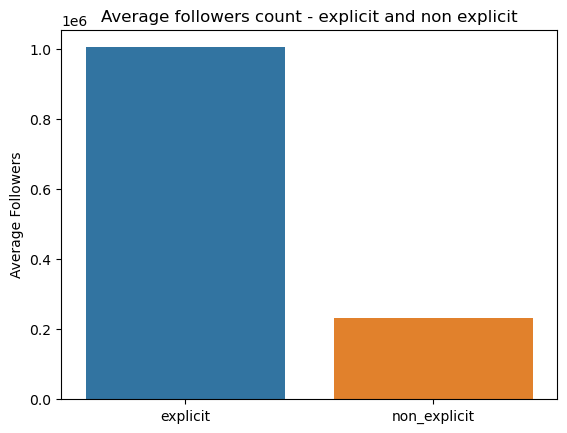

In [25]:
sns.barplot(x=ex_noex_folowers.index,y=ex_noex_folowers['Average Followers'])
plt.title('Average followers count - explicit and non explicit')
plt.show()

### 8 Does speechiness affect the popularity


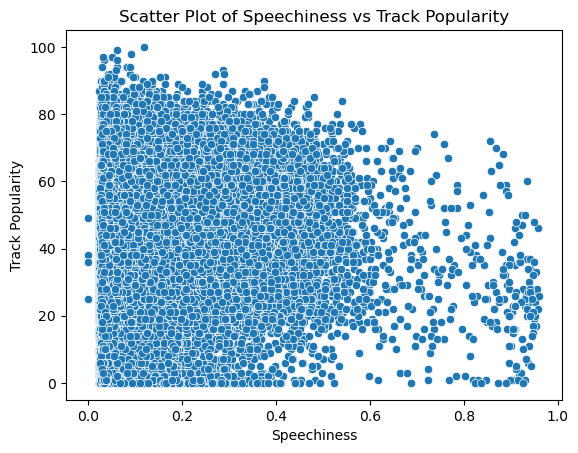

In [26]:
sns.scatterplot(x='speechiness', y='track_popularity', data=merged)

plt.xlabel('Speechiness')
plt.ylabel('Track Popularity')
plt.title('Scatter Plot of Speechiness vs Track Popularity')
plt.show()

### 9 TOP 10 Artist who dont sing any explicit song

In [27]:
# Assuming your dataset is named 'merged' and contains 'artist_popularity', 'explicit', and 'artist_name' columns

# Find artists with explicit songs
explicit_artists = merged[merged['explicit'] == 1]['artist_name'].unique()

# Filter out explicit artists from the dataset
non_explicit_songs = merged[~merged['artist_name'].isin(explicit_artists)]

top_10_nonexp_artist= non_explicit_songs.groupby('artist_name')['artist_popularity'].mean().nlargest(10)
top_10_nonexp_artist


artist_name
Giveon          91.0
Harry Styles    90.0
Sia             90.0
Coldplay        89.0
Queen           89.0
Shawn Mendes    89.0
Kali Uchis      88.0
NF              88.0
The Beatles     88.0
BLACKPINK       87.0
Name: artist_popularity, dtype: float64

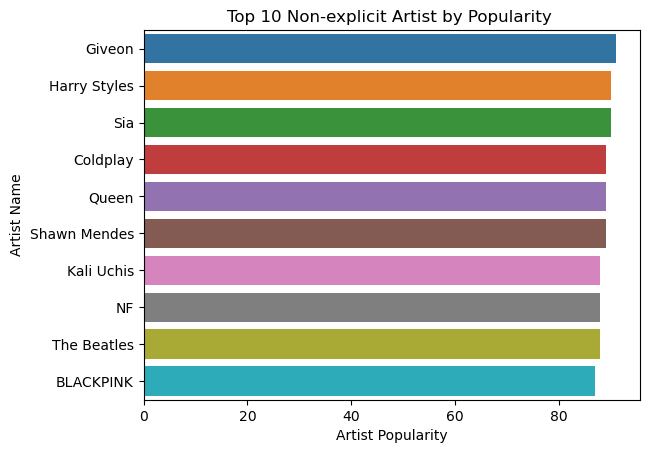

In [28]:
sns.barplot(x=top_10_nonexp_artist.values,y=top_10_nonexp_artist.index)
plt.xlabel('Artist Popularity')
plt.ylabel('Artist Name')
plt.title('Top 10 Non-explicit Artist by Popularity ')
plt.show()

# top 10 explicit artist by followers

In [29]:
top_10_exp_artist_followers=merged[(merged['explicit'] == 1 )].groupby('artist_name')['followers'].mean().nlargest(10)


In [30]:
top_10_exp_artist_followers

artist_name
Ed Sheeran         78900234.0
Ariana Grande      61301006.0
Drake              54416812.0
Justin Bieber      44606973.0
Eminem             43747833.0
Billie Eilish      41792604.0
Taylor Swift       38869193.0
Imagine Dragons    33665795.0
Bad Bunny          32244734.0
Post Malone        32167665.0
Name: followers, dtype: float64

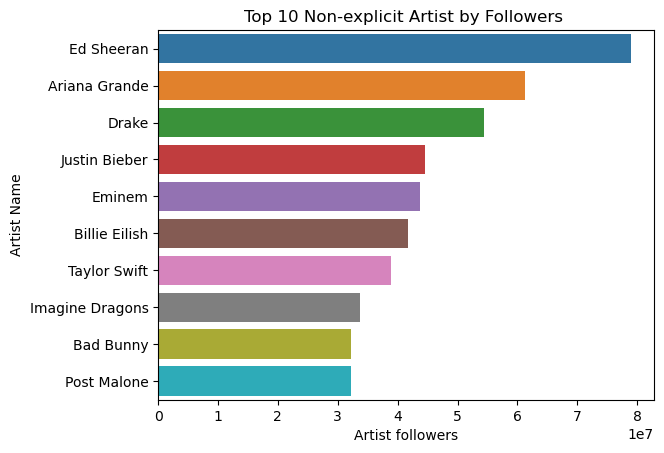

In [31]:
sns.barplot(x=top_10_exp_artist_followers.values,y=top_10_exp_artist_followers.index)
plt.xlabel('Artist followers')
plt.ylabel('Artist Name')
plt.title('Top 10 Non-explicit Artist by Followers ')
plt.show()

### 10 Top artists with most number of songs

In [32]:
top_10_artist_track_count=pd.pivot_table(index='artist_name',data=merged,values='track_name',aggfunc='count').nlargest(10,'track_name')
top_10_artist_track_count

,track_name
artist_name,
Taylor Swift,379
J Balvin,340
Justin Bieber,291
BTS,270
Pritam,243
Eason Chan,231
ARASHI,226
Maroon 5,206
A.R. Rahman,199


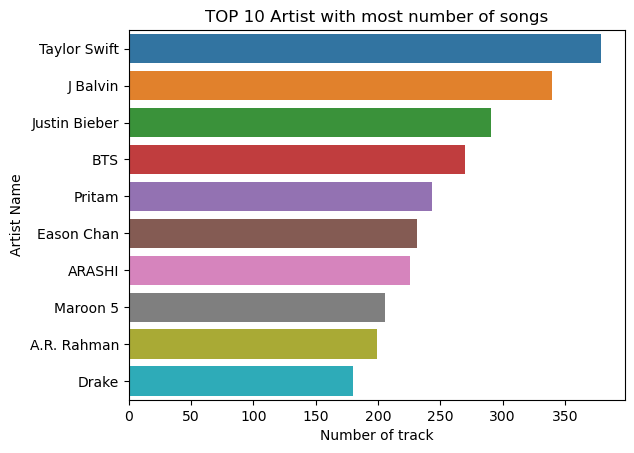

In [33]:
sns.barplot(y=top_10_artist_track_count.index,x=top_10_artist_track_count.track_name)
plt.xlabel('Number of track')
plt.ylabel('Artist Name')
plt.title('TOP 10 Artist with most number of songs')
plt.show()

# month wise track count

In [44]:
monthwise_count=merged.release_month.value_counts()

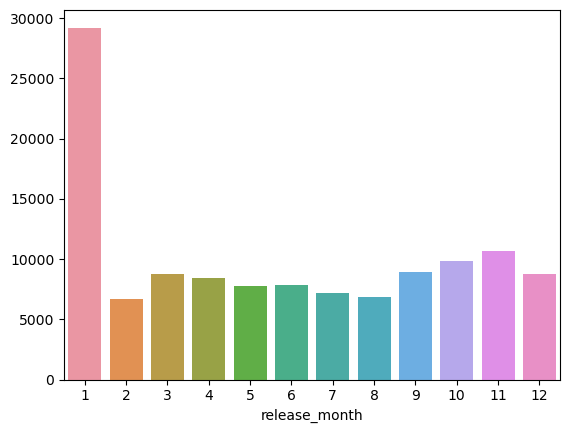

In [45]:
sns.barplot(x=monthwise_count.index,y=monthwise_count.values)
plt.show()

# month wise average popularity

In [61]:
monthwise_trackPopularity=merged.groupby('release_month')['track_popularity'].mean()

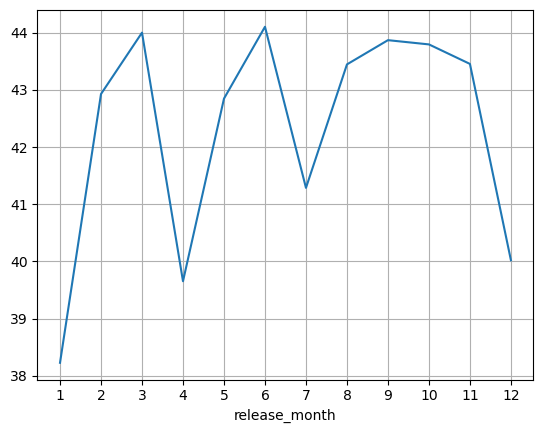

In [60]:
sns.lineplot(x=monthwise_trackPopularity.index,y=monthwise_trackPopularity.values)
plt.xticks(np.arange(1,13))
plt.grid()
plt.show()

In [68]:
df=merged.groupby(by=['release_year','release_month'])['track_popularity'].mean()


release_year  release_month
2001          1                35.026853
              2                35.067114
              3                36.474510
              4                39.304348
              5                40.440000
              6                34.044248
              7                38.016736
              8                37.270742
              9                38.971223
              10               40.739550
              11               38.305994
              12               34.756098
2002          1                33.858121
              2                38.313808
              3                35.966790
              4                34.812261
              5                37.540441
              6                34.529954
              7                36.810078
              8                29.038462
Name: track_popularity, dtype: float64